In [19]:
import pandas as pd

In [12]:
# Create a dataframe with all countries and their iso3 codes
df = pd.read_csv(
    "https://raw.githubusercontent.com/datasets/country-list/master/data.csv"
)
df = df.rename(columns={"Name": "country", "Code": "iso2"})
df = df[["country", "iso2"]]
df = df.drop_duplicates(subset=["country", "iso2"])
df = df.dropna()
df = df.reset_index(drop=True)
df = df.sort_values(by=["country"])
df = df.reset_index(drop=True)

In [21]:
# save the dataframe to a csv file in ./data
df.to_csv(
    "./data/countries.csv",
    index=False,
    header=True,
    encoding="utf-8",
)

In [17]:
# for each country, generate a synthetic time series from 1980 to 2020
# and save it in ./data/iso2/imports.csv
import os
import numpy as np
import random

def generate_synthetic_data(country, iso2):
    # Generate a random seed based on the country string name
    seed = hash(country) % (2**32)
    random.seed(seed)
    np.random.seed(seed)
    
    # Generate a time series from 1980 to 2020
    years = list(range(1980, 2021))
    data = [random.randint(1000, 10000) for _ in range(len(years))]
    
    # Create a dataframe
    df = pd.DataFrame({"year": years, "value": data})
    
    # Save the dataframe to a csv file
    os.makedirs(f"./data/{iso2}", exist_ok=True)
    df.to_csv(f"./data/{iso2}/imports.csv", index=False)

# Generate synthetic data for each country
for index, row in df.iterrows():
    country = row["country"]
    iso2 = row["iso2"]
    generate_synthetic_data(country, iso2)
    print(f"Generated data for {country} ({iso2})")

Generated data for Afghanistan (AF)
Generated data for Albania (AL)
Generated data for Algeria (DZ)
Generated data for American Samoa (AS)
Generated data for Andorra (AD)
Generated data for Angola (AO)
Generated data for Anguilla (AI)
Generated data for Antarctica (AQ)
Generated data for Antigua and Barbuda (AG)
Generated data for Argentina (AR)
Generated data for Armenia (AM)
Generated data for Aruba (AW)
Generated data for Australia (AU)
Generated data for Austria (AT)
Generated data for Azerbaijan (AZ)
Generated data for Bahamas (BS)
Generated data for Bahrain (BH)
Generated data for Bangladesh (BD)
Generated data for Barbados (BB)
Generated data for Belarus (BY)
Generated data for Belgium (BE)
Generated data for Belize (BZ)
Generated data for Benin (BJ)
Generated data for Bermuda (BM)
Generated data for Bhutan (BT)
Generated data for Bolivia, Plurinational State of (BO)
Generated data for Bonaire, Sint Eustatius and Saba (BQ)
Generated data for Bosnia and Herzegovina (BA)
Generated

Text(0.5, 1.0, 'Synthetic Imports Data for Bhutan')

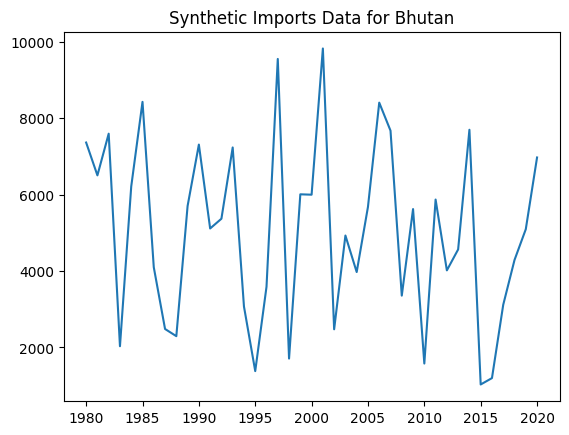

In [18]:
# plot data for bhutan
import matplotlib.pyplot as plt
bhutan_df = pd.read_csv("./data/BT/imports.csv")
plt.plot(bhutan_df["year"], bhutan_df["value"])
plt.title("Synthetic Imports Data for Bhutan")